In [16]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

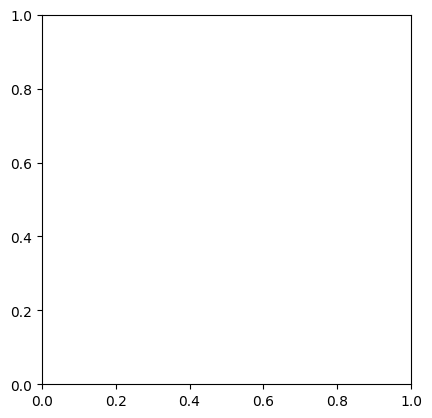

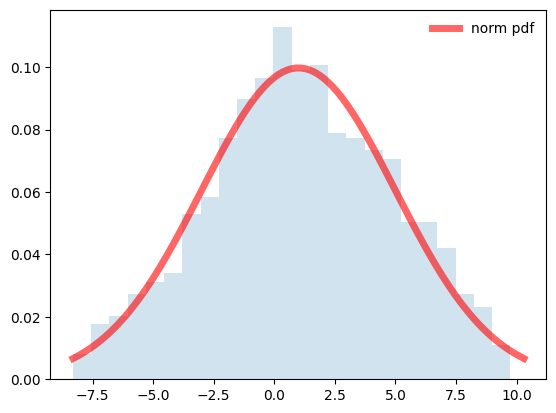

Normal distribution
Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 1.1577710393242657
Sample variance: 16.183379510729885


In [17]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Normal distribution")
print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

## Comment
This part demonstrates the relationship between the theoretical normal distribution
and the sampled data. The histogram aligns closely with the PDF, showing the bell-shaped curve.
The sample mean and variance are close to their theoretical counterparts, with small deviations due to random sampling.

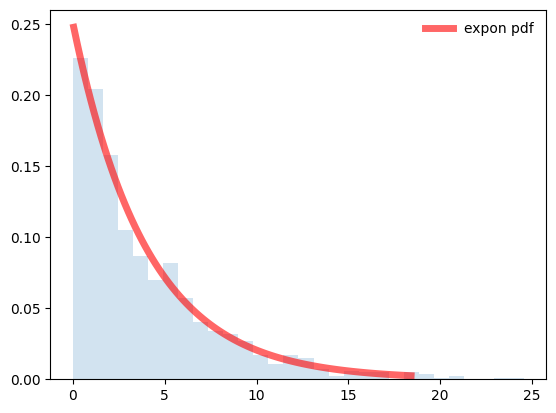

Exponential Distribution
Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 3.929569722076846
Sample variance: 15.070703119467106


In [18]:
#Exponential

rv_expon = expon(scale=4)
x_expon = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_expon, rv_expon.pdf(x_expon), 'r-', lw=5, alpha=0.6, label='expon pdf')
r_expon = rv_expon.rvs(size=1000)
ax.hist(r_expon, density=True, histtype='stepfilled', alpha=0.2, bins=30)

ax.legend(loc='best', frameon=False)
plt.show()

print("Exponential Distribution")
print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r_expon)))
print("Sample variance: {0}".format(np.var(r_expon)))

#hint: expon

## Comment
The exponential distribution is characterized by a rapid decay in probability density.
The histogram closely follows the theoretical PDF, which decreases exponentially.
The sample statistics align well with the theoretical mean and variance.

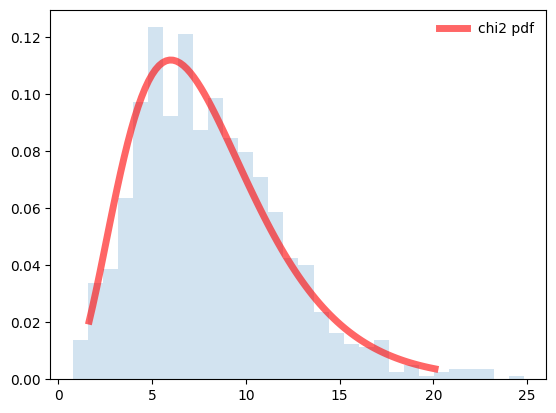

Chi-Squared Distribution
Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.11294895861028
Sample variance: 15.13907088677682


In [19]:
#chi2

rv_chi2 = chi2(df=8)
x_chi2 = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_chi2, rv_chi2.pdf(x_chi2), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r_chi2 = rv_chi2.rvs(size=1000)  
ax.hist(r_chi2, density=True, histtype='stepfilled', alpha=0.2, bins=30)

ax.legend(loc='best', frameon=False)
plt.show()

print("Chi-Squared Distribution")
print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r_chi2)))
print("Sample variance: {0}".format(np.var(r_chi2)))

#hint: chi2

## Comment
The chi-squared distribution is asymmetric and skewed to the right.
The histogram reflects the theoretical PDF's shape, with most values clustered near the peak.
Sample statistics are consistent with the theoretical mean and variance.

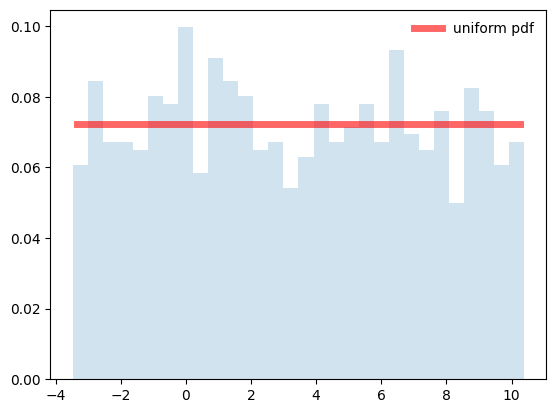

Uniform Distribution
Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.37346549166953
Sample variance: 15.616714402491954


In [20]:
#uniform

a = -2 * np.sqrt(3)
b = 6 * np.sqrt(3)
rv_uniform = uniform(loc=a, scale=(b - a))
x_uniform = np.linspace(rv_uniform.ppf(0.01), rv_uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_uniform, rv_uniform.pdf(x_uniform), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r_uniform = rv_uniform.rvs(size=1000)
ax.hist(r_uniform, density=True, histtype='stepfilled', alpha=0.2, bins=30)

ax.legend(loc='best', frameon=False)
plt.show()

print("Uniform Distribution")
print("Distribution mean: {0}".format(rv_uniform.stats(moments='m')))
print("Distribution variance: {0}".format(rv_uniform.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r_uniform)))
print("Sample variance: {0}".format(np.var(r_uniform)))


#hint: uniform

## Comment
The uniform distribution has a constant probability density across its range.
The histogram is flat, matching the theoretical PDF.
Sample mean and variance align closely with theoretical values, confirming the uniformity.

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

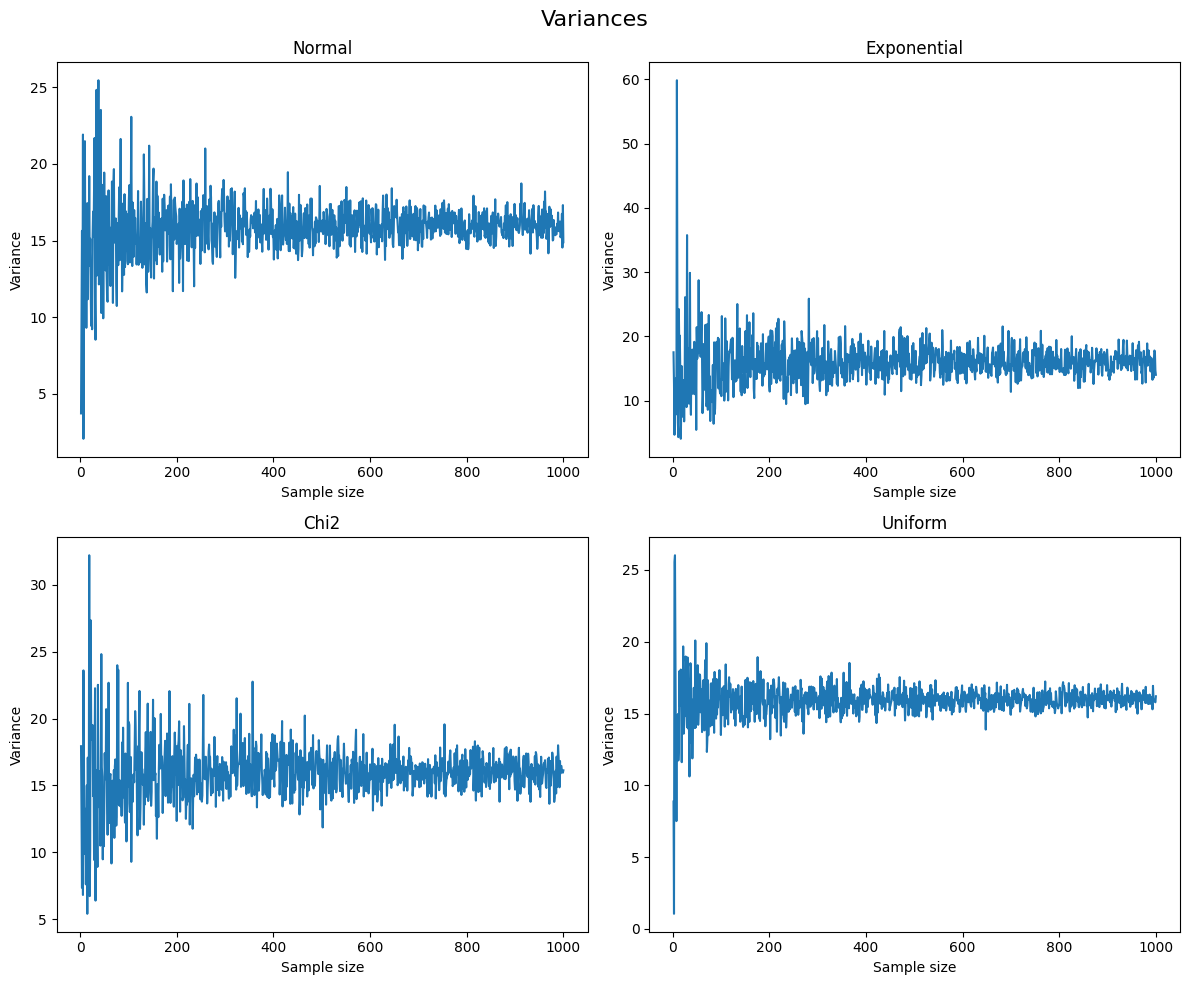

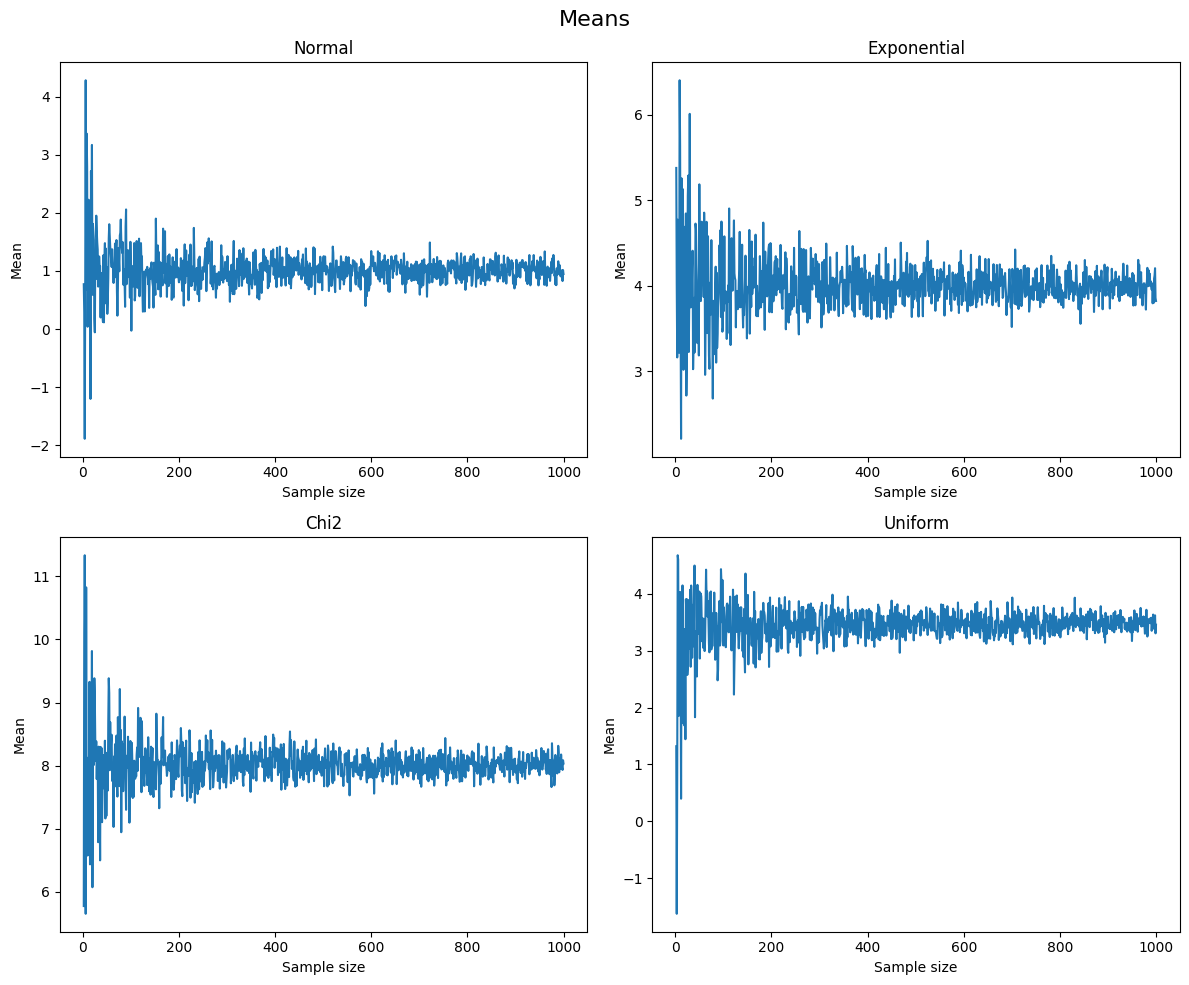

In [21]:
#here goes your code

# params for distribution
rv_normal = norm(loc=1, scale=4)
rv_expon = expon(scale=4)
rv_chi2 = chi2(df=8)
rv_uniform = uniform(loc=a, scale=(b - a))

# Function to calculate running means and variances
def running_statistics(dist, size=1000):
    means = []
    variances = []
    for N in range(2, size + 1):
        samples = dist.rvs(size=N)
        means.append(np.mean(samples))
        variances.append(np.var(samples))
    return means, variances

# Generate data for each distribution
normal_means, normal_variances = running_statistics(rv_normal)
expon_means, expon_variances = running_statistics(rv_expon)
chi2_means, chi2_variances = running_statistics(rv_chi2)
uniform_means, uniform_variances = running_statistics(rv_uniform)

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Variances", fontsize=16)

axs[0, 0].plot(range(2, 1001), normal_variances)
axs[0, 0].set_title("Normal")
axs[0, 0].set_xlabel("Sample size")
axs[0, 0].set_ylabel("Variance")

axs[0, 1].plot(range(2, 1001), expon_variances)
axs[0, 1].set_title("Exponential")
axs[0, 1].set_xlabel("Sample size")
axs[0, 1].set_ylabel("Variance")

axs[1, 0].plot(range(2, 1001), chi2_variances)
axs[1, 0].set_title("Chi2")
axs[1, 0].set_xlabel("Sample size")
axs[1, 0].set_ylabel("Variance")

axs[1, 1].plot(range(2, 1001), uniform_variances)
axs[1, 1].set_title("Uniform")
axs[1, 1].set_xlabel("Sample size")
axs[1, 1].set_ylabel("Variance")

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Means", fontsize=16)

axs[0, 0].plot(range(2, 1001), normal_means)
axs[0, 0].set_title("Normal")
axs[0, 0].set_xlabel("Sample size")
axs[0, 0].set_ylabel("Mean")

axs[0, 1].plot(range(2, 1001), expon_means)
axs[0, 1].set_title("Exponential")
axs[0, 1].set_xlabel("Sample size")
axs[0, 1].set_ylabel("Mean")

axs[1, 0].plot(range(2, 1001), chi2_means)
axs[1, 0].set_title("Chi2")
axs[1, 0].set_xlabel("Sample size")
axs[1, 0].set_ylabel("Mean")

axs[1, 1].plot(range(2, 1001), uniform_means)
axs[1, 1].set_title("Uniform")
axs[1, 1].set_xlabel("Sample size")
axs[1, 1].set_ylabel("Mean")

plt.tight_layout()
plt.show()


## Comments on Variance Plots
1. Normal Distribution: 
    - The sample variance converges smoothly to the theoretical variance as the sample size increases.
    - The convergence is steady, reflecting the properties of the Normal distribution's centrality.
2. Exponential Distribution:
    - Variance fluctuates more significantly for small sample sizes but stabilizes around the theoretical variance.
    - This behavior is expected due to the exponential distribution's skewness and higher sensitivity to smaller samples.
3. Chi-Squared Distribution:
    - The sample variance shows greater fluctuations initially but converges to the theoretical variance
    - The Chi-squared distribution, being highly asymmetric, leads to higher variability in small samples.
4. Uniform Distribution:
    - The sample variance stabilizes around the theoretical value
    - The uniform distribution shows relatively quicker stabilization compared to others due to its bounded nature.
## Comments on Mean Plots
1. Normal Distribution:
    - The sample mean quickly converges to the theoretical mean
    - The smooth and steady convergence aligns with the Normal distribution's properties.
2. Exponential Distribution:
    - The sample mean initially fluctuates more due to the skewed nature of the distribution but converges to the theoretical mean.
3. Chi-Squared Distribution:
    - Like the variance, the sample mean fluctuates more significantly for smaller sample sizes but eventually stabilizes around the theoretical mean
4. Uniform Distribution:
    - The sample mean quickly converges to the theoretical mean
    - Uniform distribution shows relatively less variability in sample means due to its bounded nature.
## Observations from the Law of Large Numbers
- As the sample size increases, the sample mean and variance for all distributions converge towards their respective theoretical values.
- The speed of convergence and initial variability depend on the distribution's shape and properties.
- Distributions with higher skewness (e.g., Exponential and Chi-Squared) exhibit greater fluctuations in smaller samples compared to symmetric ones (e.g., Normal and Uniform).

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

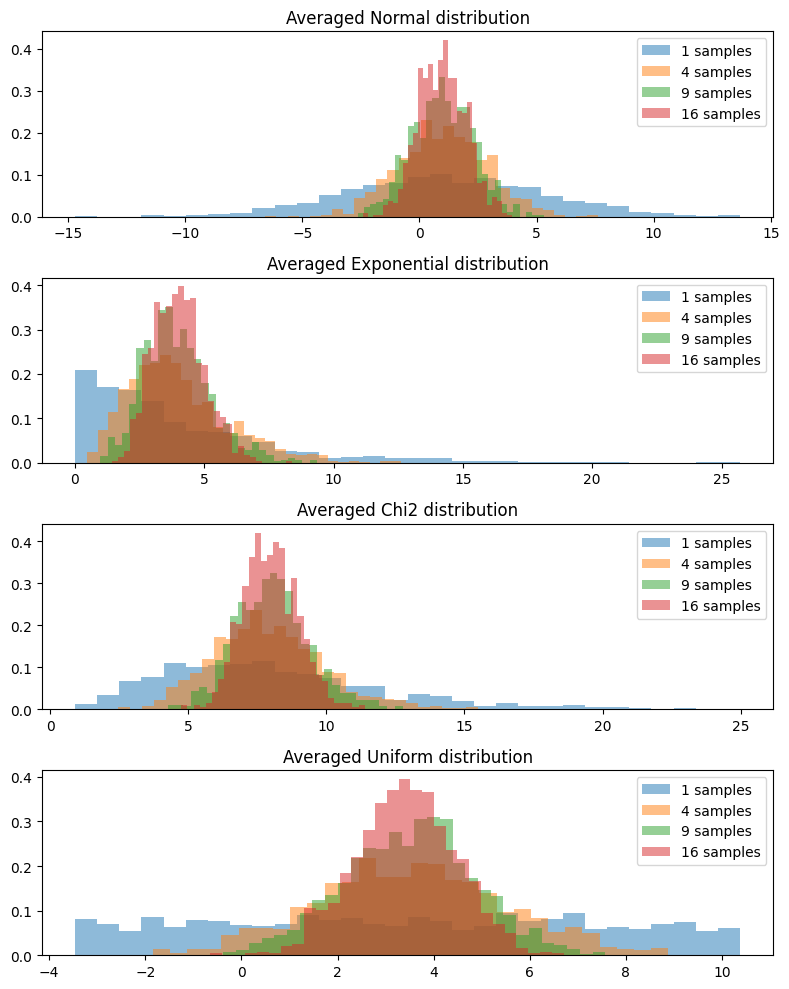

In [22]:
#here goes your code

distributions = {
    "Normal": norm(loc=1, scale=4),
    "Exponential": expon(scale=4),
    "Chi2": chi2(df=8),
    "Uniform": uniform(loc=a, scale=(b - a))
}

N_values = [1, 4, 9, 16]
fig, axs = plt.subplots(len(distributions), 1, figsize=(8, 10))

for idx, (dist_name, dist) in enumerate(distributions.items()):
    for N in N_values:
        averaged_samples = [np.mean(dist.rvs(size=N)) for _ in range(1000)]
        axs[idx].hist(averaged_samples, bins=30, alpha=0.5, density=True, label=f"{N} samples")
    axs[idx].set_title(f"Averaged {dist_name} distribution")
    axs[idx].legend()

plt.tight_layout()
plt.show()


## Observations from the Plots:
1. Normal Distribution:
   - As N increases, the averaged distribution becomes sharper and more concentrated around the mean. This aligns with the fact that averaging samples reduces variance, but since the original distribution is already Gaussian, its shape does not drastically change.
 
2. Exponential Distribution:
   - Initially, the exponential distribution is heavily skewed to the right. As N increases, the skewness diminishes, and the distribution increasingly resembles a symmetric Gaussian. This transformation exemplifies the Central Limit Theorem, as the sum of independent random variables tends to a normal distribution.
3. Chi-Squared Distribution:
   - The Chi-Squared distribution has a positive skew initially. With increasing N, the averaged samples' distribution becomes more symmetric and converges to a Gaussian-like curve. The distribution's width also decreases, showing reduced variability.
4. Uniform Distribution:
   - A uniform distribution has constant probability density within its range. As N grows, the averaged samples result in a bell-shaped curve centered around the midpoint of the uniform range. This again demonstrates the Central Limit Theorem.
## Conclusion
The experiment successfully demonstrates that as the number of averaged samples increases, the resulting distribution approaches a Gaussian regardless of the initial distribution's shape. This supports the universality of the Central Limit Theorem in practical scenarios.

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

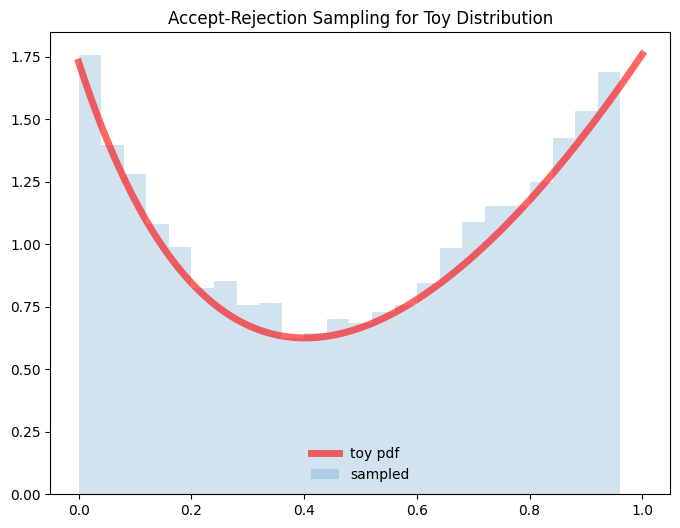

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4  # Normalization constant
    return (x**2 + np.exp(-4*x)) / C 

def accept_rejection_sampling(dist, size=1):
    samples = []
    a, b = 0, 1  # Interval [0, 1]
    x = np.linspace(a, b, 1000)
    M = max(dist(x))  # Supremum of the distribution in [0, 1]
    
    while len(samples) < size:
        t = np.random.uniform(a, b)  # Sample t from Uniform[a, b]
        u = np.random.uniform(0, M)  # Sample u from Uniform[0, M]
        if dist(t) > u:  # Accept if u < g(t)
            samples.append(t)
    return np.array(samples)

# Generate samples
x = np.linspace(0, 1, 1000)
samples = accept_rejection_sampling(toy_dist, size=10000)  # Pass the function toy_dist, not toy_dist(x)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins=x[::40], label="sampled")
ax.legend(loc='best', frameon=False)
plt.title("Accept-Rejection Sampling for Toy Distribution")
plt.show()


## Observation from the plot
1. Toy distribution:
- The red curve represents the toy PDF defined mathematically. It is normalized to ensure it integrates to 1 over the interval [0,1]
2. Sampled Distribution: 
- The histogram represents the samples generated using the accept-rejection sampling algorithm. The histogram closely follows the shape of the red curve, indicating that the algorithm accurately captures the original PDF.
3. Efficiency: 
- While the algorithm works well, its efficiency depends on how well the uniform bounding box fits the actual PDF. For highly skewed or irregular distributions, the rejection rate may be higher, requiring more iterations to generate sufficient samples.
## Conclusion
The accept-rejection sampling algorithm provides a versatile method for sampling from complex, bounded distributions. The generated samples closely align with the toy distribution, showcasing the algorithm's accuracy and flexibility.


# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

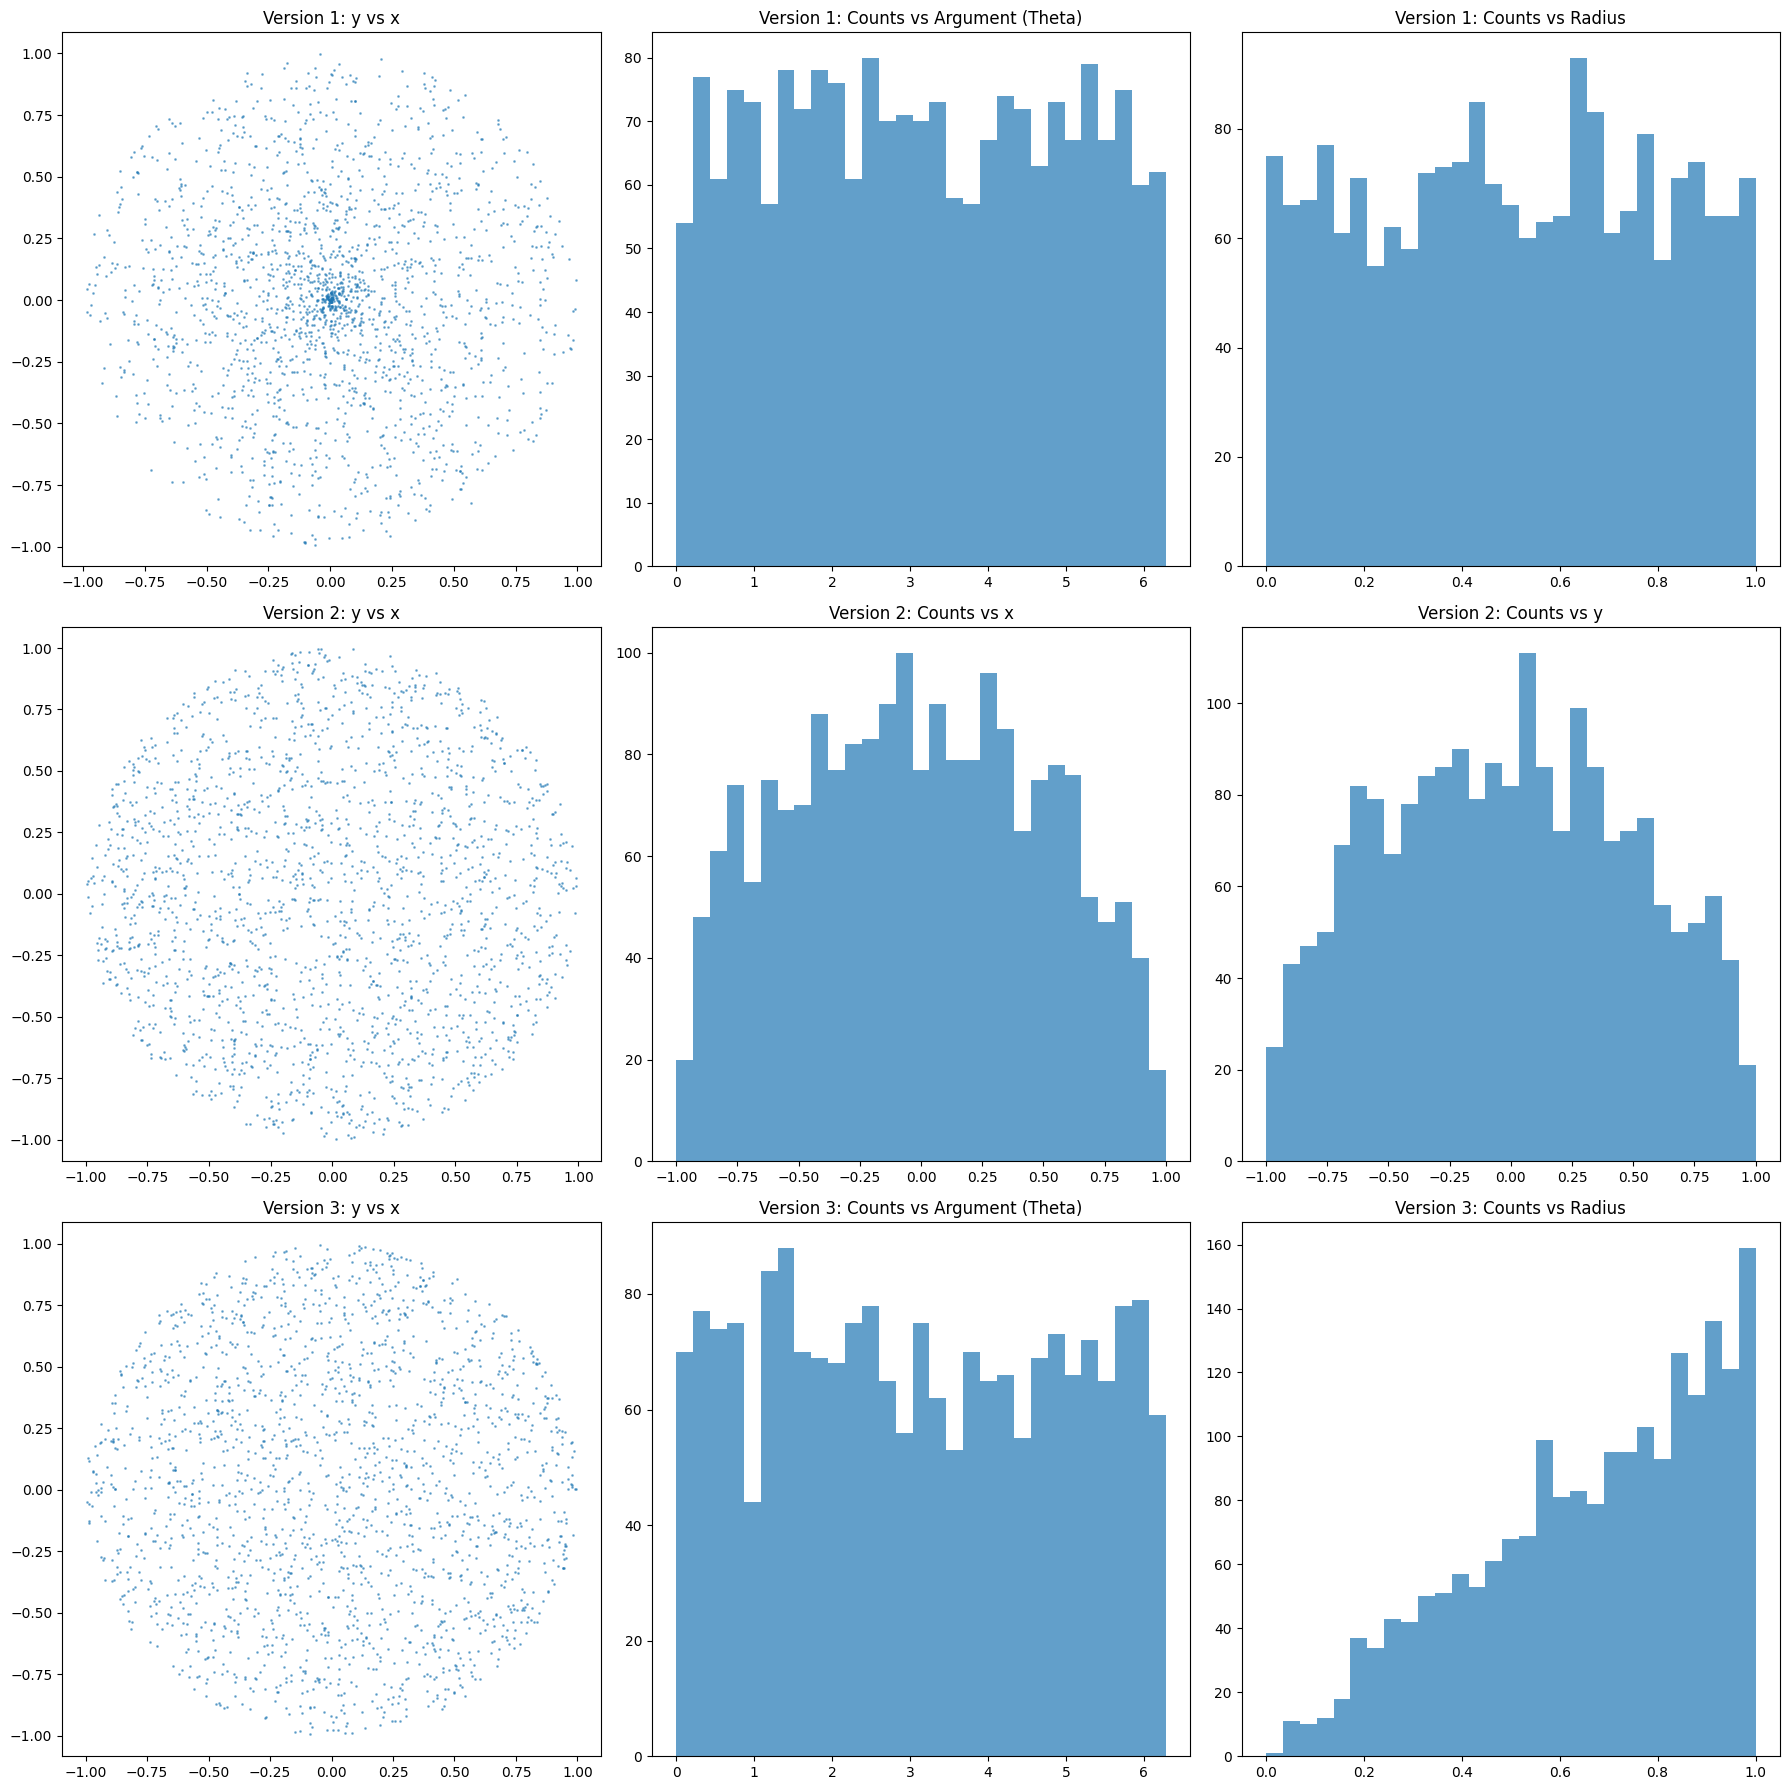

In [24]:
#Version1
#here goes your code

import numpy as np
import matplotlib.pyplot as plt

n_points = 2000

# Version 1: Uniform distribution of radius (0,1) and argument (0,2π)
r1 = np.random.uniform(0, 1, n_points)
theta1 = np.random.uniform(0, 2 * np.pi, n_points)

# Convert to Cartesian coordinates
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Histogram bins for Version 1
theta_bins = np.linspace(0, 2 * np.pi, 30)
r_bins = np.linspace(0, 1, 30)
theta_counts1, _ = np.histogram(theta1, bins=theta_bins)
r_counts1, _ = np.histogram(r1, bins=r_bins)

# Version 2: Uniform distribution of x and y (-1,1), filter points outside disk
x2 = np.random.uniform(-1, 1, n_points * 2)
y2 = np.random.uniform(-1, 1, n_points * 2)

# Keep only points inside the unit disk
mask = x2**2 + y2**2 <= 1
x2 = x2[mask][:n_points]
y2 = y2[mask][:n_points]

# Histogram bins for Version 2
x_bins = np.linspace(-1, 1, 30)
y_bins = np.linspace(-1, 1, 30)
x_counts2, _ = np.histogram(x2, bins=x_bins)
y_counts2, _ = np.histogram(y2, bins=y_bins)

# Version 3: Modify Version 1 to mimic Version 2 (adjust radius distribution)
r3 = np.sqrt(np.random.uniform(0, 1, n_points))  # sqrt ensures uniformity in 2D disk
theta3 = np.random.uniform(0, 2 * np.pi, n_points)

# Convert to Cartesian coordinates
x3 = r3 * np.cos(theta3)
y3 = r3 * np.sin(theta3)

# Histogram bins for Version 3
theta_counts3, _ = np.histogram(theta3, bins=theta_bins)
r_counts3, _ = np.histogram(r3, bins=r_bins)

# Plot results
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Version 1 plots
axs[0, 0].scatter(x1, y1, s=1, alpha=0.5)
axs[0, 0].set_title("Version 1: y vs x")
axs[0, 0].axis("equal")
axs[0, 1].bar(theta_bins[:-1], theta_counts1, width=np.diff(theta_bins), align='edge', alpha=0.7)
axs[0, 1].set_title("Version 1: Counts vs Argument (Theta)")
axs[0, 2].bar(r_bins[:-1], r_counts1, width=np.diff(r_bins), align='edge', alpha=0.7)
axs[0, 2].set_title("Version 1: Counts vs Radius")

# Version 2 plots
axs[1, 0].scatter(x2, y2, s=1, alpha=0.5)
axs[1, 0].set_title("Version 2: y vs x")
axs[1, 0].axis("equal")
axs[1, 1].bar(x_bins[:-1], x_counts2, width=np.diff(x_bins), align='edge', alpha=0.7)
axs[1, 1].set_title("Version 2: Counts vs x")
axs[1, 2].bar(y_bins[:-1], y_counts2, width=np.diff(y_bins), align='edge', alpha=0.7)
axs[1, 2].set_title("Version 2: Counts vs y")

# Version 3 plots
axs[2, 0].scatter(x3, y3, s=1, alpha=0.5)
axs[2, 0].set_title("Version 3: y vs x")
axs[2, 0].axis("equal")
axs[2, 1].bar(theta_bins[:-1], theta_counts3, width=np.diff(theta_bins), align='edge', alpha=0.7)
axs[2, 1].set_title("Version 3: Counts vs Argument (Theta)")
axs[2, 2].bar(r_bins[:-1], r_counts3, width=np.diff(r_bins), align='edge', alpha=0.7)
axs[2, 2].set_title("Version 3: Counts vs Radius")

plt.tight_layout()
plt.show()


## Comment
1. Version 1: Uniform Radius and Argument Distribution
- The scatterplot reveals that there’s a denser cluster of points near the center of the circle. This is because the uniform distribution of radius means each annular ring gets the same number of points, but smaller rings near the center occupy less area.
- The histogram of arguments (theta) shows a uniform distribution—every direction from the origin is equally likely.
- The radius histogram fluctuates casually without any strong pattern, reflecting the uniform sampling within [0, 1].
2. Version 2: Uniform x and y, Filtered to Disk
- The histograms of x and y coordinates reveal a bell-shaped (or triangular) distribution. This occurs because the uniform sampling in a square, followed by rejection outside the circle, means points near the edges of the disk have less coverage.
- The scatterplot shows an evenly distributed set of points across the entire disk. There’s no favoritism for the center this time!
3. Radius Adjusted to Mimic 2D Uniformity
- By taking the square root of the uniform radius, the area distribution becomes uniform, resulting in an even density of points across the circle. This fixes the center-clumping issue from Version 1.
- The argument distribution remains consistent and uniform, just like in Version 1. Every angle still gets its fair share.
- The radius histogram now shows an increasing trend (like a staircase). This is expected because the probability of a point falling in an annular ring grows with the ring's area
## Key takeaways:
- When it comes to probability space, fairness isn't always obvious.
- Rejection is an art, but efficiency has a heart.
- Shapes of histograms tell stories of sampling.

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [25]:
S = 100 # Decrease if computations take too long
num_walks = 20553
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
planes = []
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

In [26]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [27]:
#here goes your code

C:\Users\falan\AppData\Local\Temp\ipykernel_9908\1266162087.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


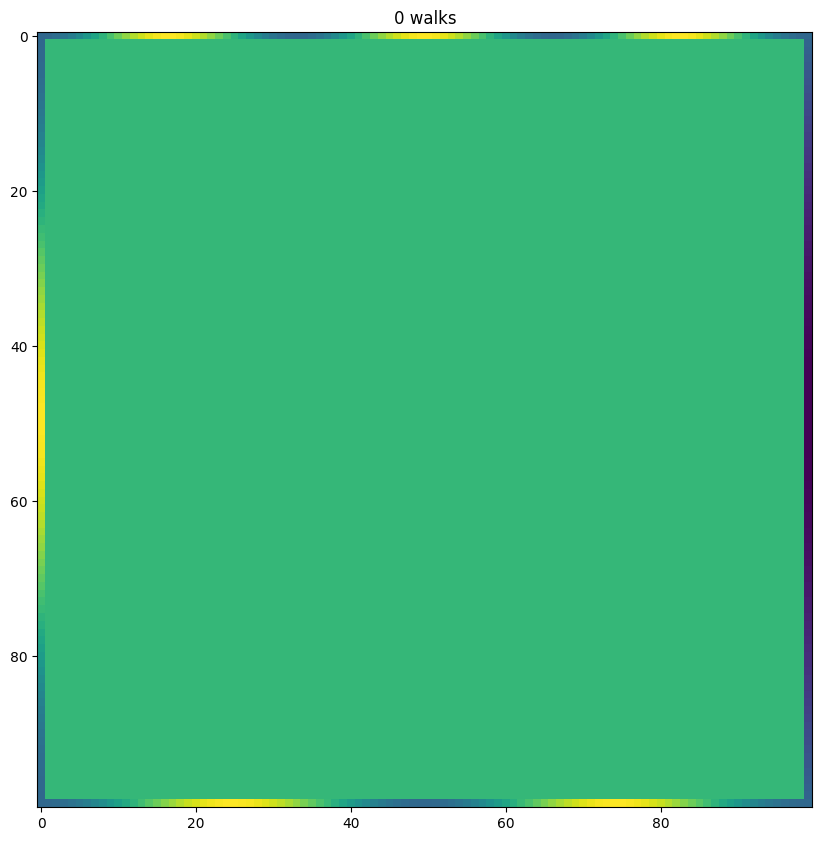

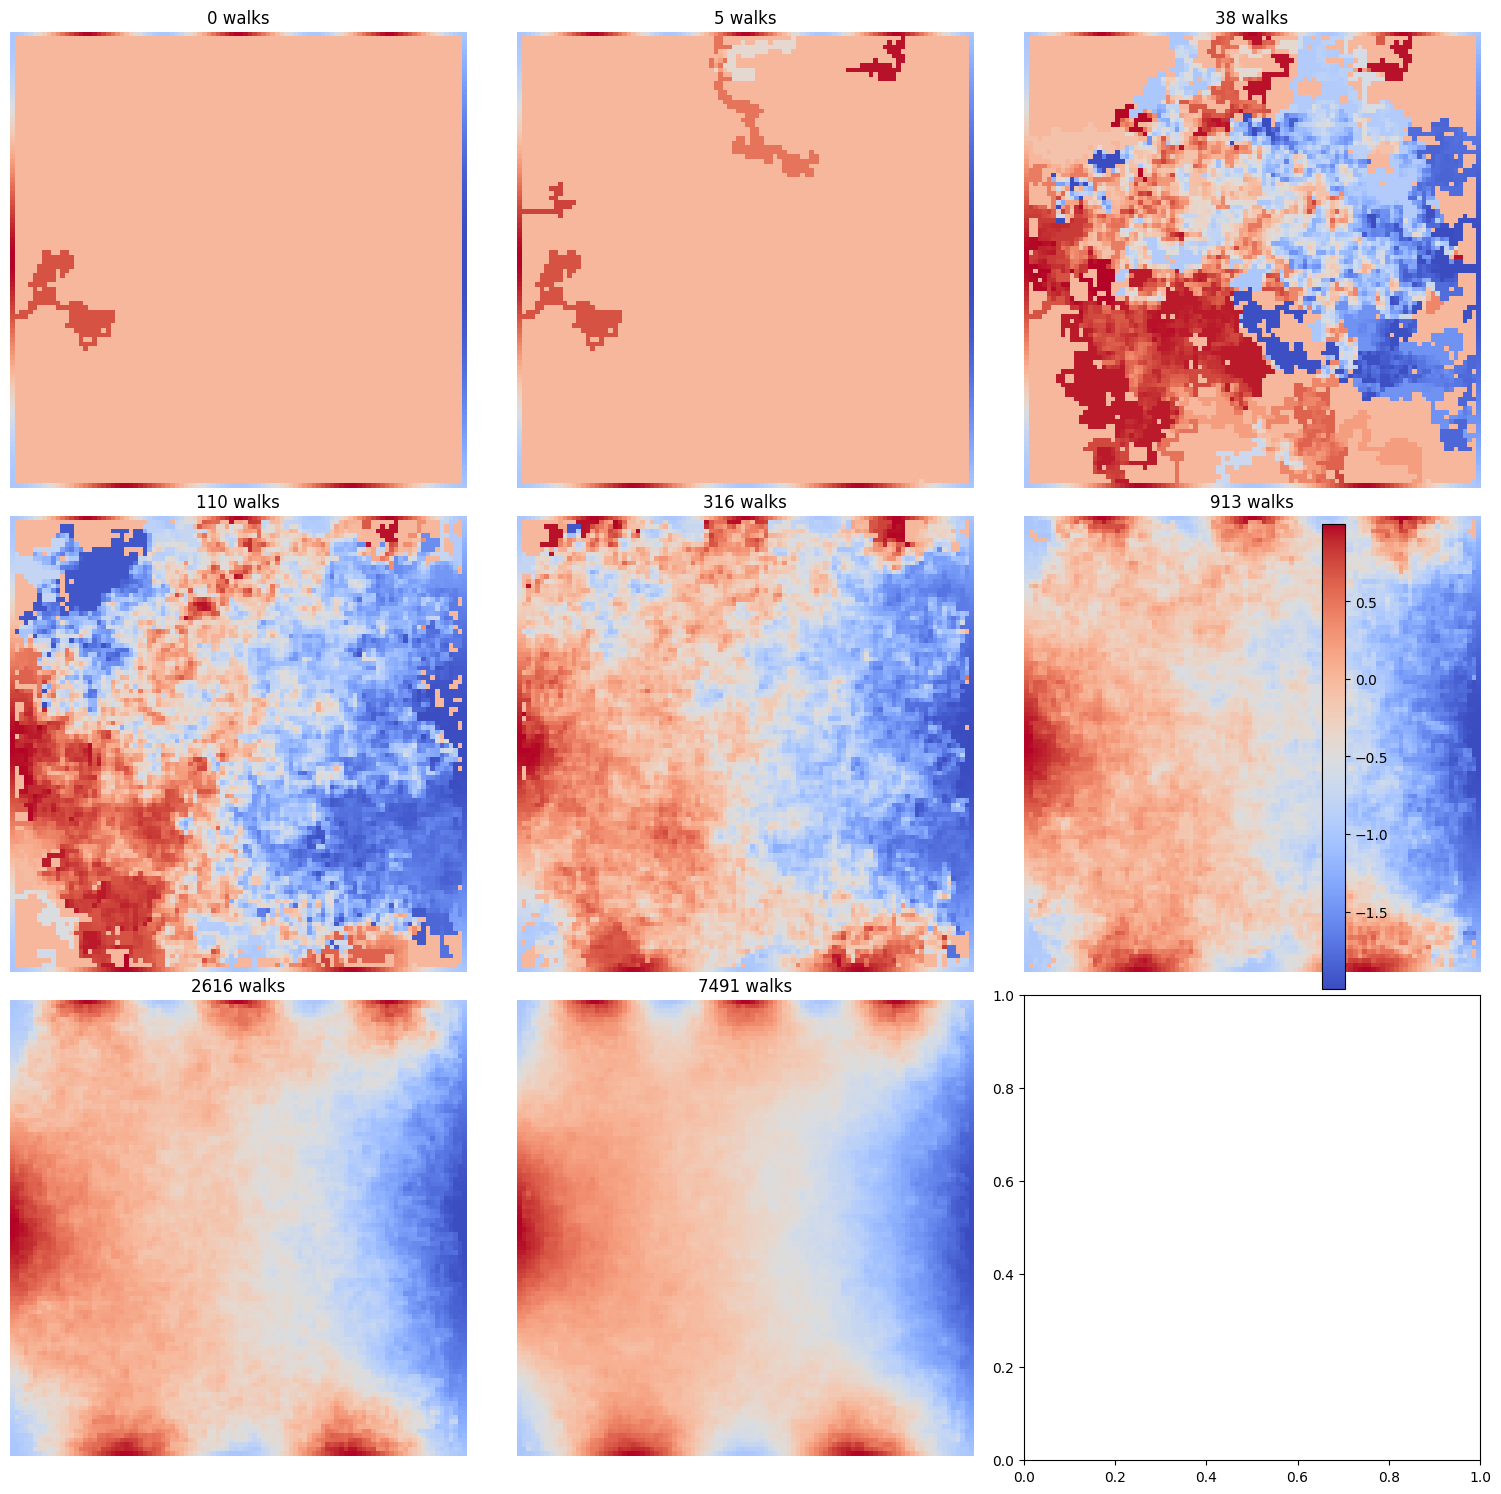

In [28]:
def is_boundary(x, y):
    return x == 0 or x == S-1 or y == 0 or y == S-1

plot_walks = [0, 5, 38, 110, 316, 913, 2616, 7491, 20553]

# Initialize figure
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Save the initial state for consistent color scaling
initial_plane = np.copy(plane)
vmin, vmax = np.min(initial_plane), np.max(initial_plane)  # Fixed color scale

# Monte Carlo simulation
for walk in range(num_walks):
    # Start at a random internal position
    x, y = np.random.randint(1, S-1), np.random.randint(1, S-1)
    walk_path = []

    while not is_boundary(x, y):
        walk_path.append((x, y))  # Record path
        # Random move: up, down, left, right
        direction = np.random.choice(["up", "down", "left", "right"])
        if direction == "up":
            x -= 1
        elif direction == "down":
            x += 1
        elif direction == "left":
            y -= 1
        elif direction == "right":
            y += 1

    # Value at the boundary
    vb = plane[x, y]

    # Update values along the path
    for px, py in walk_path:
        plane_counts[px, py] += 1
        plane[px, py] = (plane_counts[px, py] - 1) * plane[px, py] / plane_counts[px, py] + vb / plane_counts[px, py]

    # Plot intermediate results
    if walk in plot_walks:
        idx = plot_walks.index(walk)
        ax = axes[idx]
        im = ax.imshow(plane, cmap="coolwarm", vmin=vmin, vmax=vmax)  # Fixed color scale
        ax.set_title(f"{walk} walks")
        ax.axis("off")
        planes.append(np.copy(plane))

# Add a colorbar to show scale
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# Adjust layout and show
plt.tight_layout()
plt.show()

In [29]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig, ax = plt.subplots()
im = ax.imshow(planes[0], cmap="coolwarm", interpolation="nearest", vmin=np.min(planes[0]), vmax=np.max(planes[0]))
ax.set_title("0 walks")
plt.colorbar(im, ax=ax)

def updatefig(j):
    im.set_array(planes[j])
    ax.set_title(f"{plot_walks[j]} walks")
    return [im]

ani = animation.FuncAnimation(
    fig, updatefig, frames=len(planes), interval=1000, blit=False
)

plt.show()